<a href="https://colab.research.google.com/github/depinsetel/DEPIN-DATA/blob/main/EAD_UBS_erros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrada e preparação de dados das UBS dos dados abertos

In [34]:
import pandas as pd
# Carregar o arquivo EXCEL
ubs = pd.read_excel("UBSabertas.xlsx")

In [38]:
# Dicionário de UF com siglas
uf_dict = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO',
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL',
    28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP', 41: 'PR',
    42: 'SC', 43: 'RS', 50: 'MS', 51: 'MT', 52: 'GO', 53: 'DF'
}

# Substituir os códigos numéricos das UFs pelas siglas
ubs['UF'] = ubs['UF'].map(uf_dict)

# Verificar a distribuição de UBS por estado usando as siglas
distribuicao_por_estado = ubs['UF'].value_counts()

In [39]:
# Mostrar as primeiras linhas para verificar se os dados foram carregados corretamente
print(ubs.head())

    CNES  UF    IBGE                                 NOME  \
0  33820  GO  520170  UNIDADE DE SAUDE DA FAMILIA PSF 307   
1    108  PE  260290                  USF ALTO DOS INDIOS   
2    116  PE  260290                      USF CHARNECA II   
3    124  PE  260290                  USF SAO FRANCISCO I   
4    132  PE  260290                          USF ROSARIO   

                   LOGRADOURO               BAIRRO  LATITUDE  LONGITUDE  
0                       RUA H           NOVO MUNDO -15.90682  -52.22545  
1                      RUA 17  PONTE DOS CARVALHOS  -8.28389  -35.03210  
2                      RUA 02             CHARNECA  -8.29273  -35.03342  
3  RUA MANOEL DOMINGOS BARROS        SAO FRANCISCO  -8.28700  -35.03500  
4                      RUA 01              ROSARIO  -8.28389  -35.03210  


Número de entradas com coordenadas duplicadas: 14978
Pares de UBS com coordenadas duplicadas:


,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE
1060,214663,RS,431100,CENTRO DE ATENDIMENTO AO COVID19 JAGUARAO,PCA HERMES PINTOS AFFONSO,CENTRO,-32.566,-53.376
38768,5367476,RS,431100,UBS CLEUZA MARIA MARTINS USSANDIZAGA,RUA RUBENS CORREA TERRA,BELA VISTA,-32.566,-53.376
39728,2707802,RS,431100,UBS DR RUDY WALTER KUSSLER,RUA MIGUEL DELELLIS,VILA KENNEDY,-32.566,-53.376
5650,2232219,RS,430130,UNIDADE BASICA DE SAUDE ZONA SUL,RUA FELISBINO DA SILVA SOARES,PROMORAR,-32.238,-53.087
5651,2232227,RS,430130,UNIDADE BASICA DE SAUDE ZONA LESTE,AV MARIA PEREIRA DAS NEVES,SAO JOSE,-32.238,-53.087
...,...,...,...,...,...,...,...,...
44209,2709821,MG,313170,UNIDADE JORGE ALVES FERREIRA,RUA MARAJO,VILA SAO GERALDO,NaN,NaN
44592,4374789,MA,211065,UNIDADE BASICA DE SAUDE DA GRUTINHA,CHAPADA,ZONA RURAL,NaN,NaN
44669,4045939,RJ,330330,SEAP RJ AMBULATORIO PENITENCIARIA VIEIRA FERRE...,AL SAO BOAVENTURA,FONSECA,NaN,NaN
44941,2275775,RJ,330390,POSTO DE SAUDE DR LATUF GIBRAIL NETO,AVENIDA BARAO DO RIO BRANCO,RETIRO,NaN,NaN


# Gráfico de Barras de UBS por Estado da Federação UF

In [ ]:
# Análise adicional: Verificar a distribuição de UBS por estado
distribuicao_por_estado = ubs['UF'].value_counts()
print("\nDistribuição de UBS por Estado:")
print(distribuicao_por_estado)

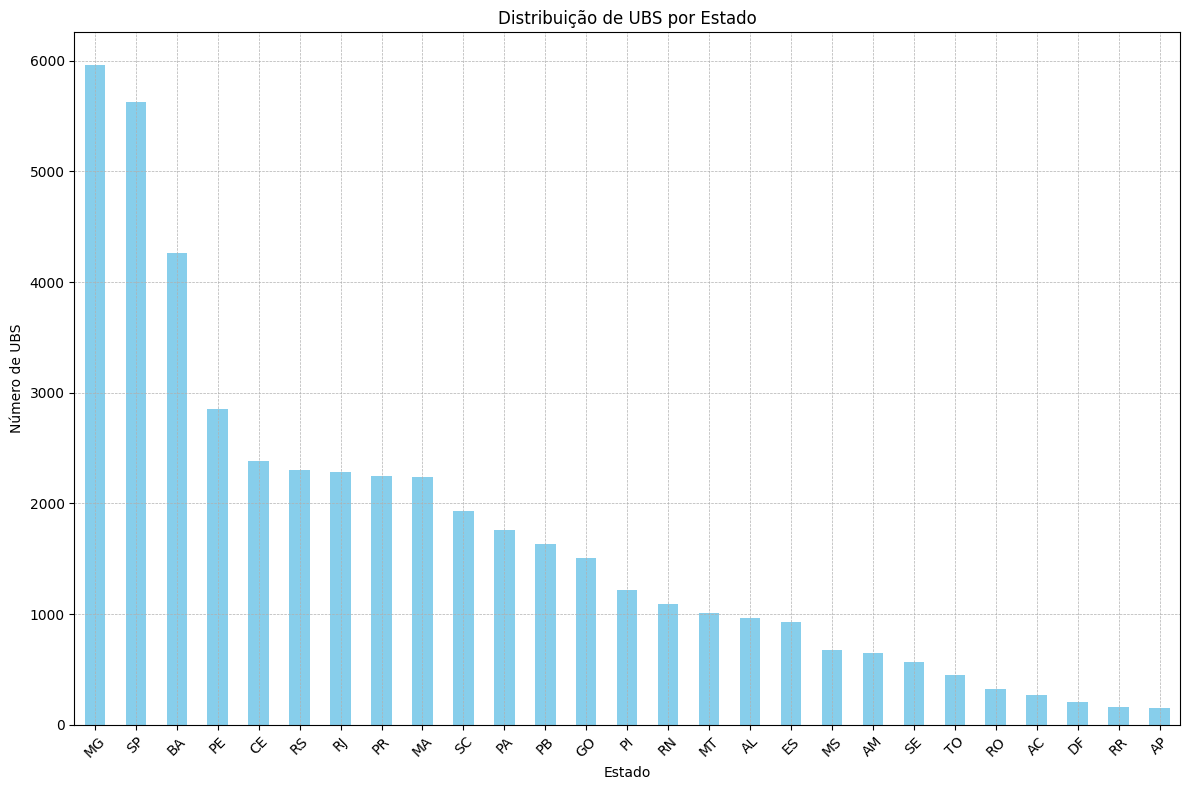

In [45]:
import pandas as pd
import matplotlib.pyplot as plt



# Ordenar os dados em ordem decrescente
distribuicao_por_estado = distribuicao_por_estado.sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
distribuicao_por_estado.plot(kind='bar', color='skyblue')
plt.title('Distribuição de UBS por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de UBS')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



# Gráfico de Barras de Coordendas Repetidas (duplicadas) por UF

In [60]:
# Checar por duplicatas nas coordenadas
coordenadas_duplicadas = ubs.duplicated(subset=['LATITUDE', 'LONGITUDE'], keep='first') | ubs.duplicated(subset=['LATITUDE', 'LONGITUDE'], keep='last')
ubs_duplicadas = ubs[coordenadas_duplicadas].sort_values(by=['LATITUDE', 'LONGITUDE'])
print("Número de entradas com coordenadas duplicadas:", len(ubs_duplicadas))
if len(ubs_duplicadas) > 0:
    print("Pares de UBS com coordenadas duplicadas:")
    display(ubs_duplicadas)

Número de entradas com coordenadas duplicadas: 14978
Pares de UBS com coordenadas duplicadas:


,CNES,UF,IBGE,NOME,LOGRADOURO,BAIRRO,LATITUDE,LONGITUDE
1060,214663,RS,431100,CENTRO DE ATENDIMENTO AO COVID19 JAGUARAO,PCA HERMES PINTOS AFFONSO,CENTRO,-32.566,-53.376
38768,5367476,RS,431100,UBS CLEUZA MARIA MARTINS USSANDIZAGA,RUA RUBENS CORREA TERRA,BELA VISTA,-32.566,-53.376
39728,2707802,RS,431100,UBS DR RUDY WALTER KUSSLER,RUA MIGUEL DELELLIS,VILA KENNEDY,-32.566,-53.376
5650,2232219,RS,430130,UNIDADE BASICA DE SAUDE ZONA SUL,RUA FELISBINO DA SILVA SOARES,PROMORAR,-32.238,-53.087
5651,2232227,RS,430130,UNIDADE BASICA DE SAUDE ZONA LESTE,AV MARIA PEREIRA DAS NEVES,SAO JOSE,-32.238,-53.087
...,...,...,...,...,...,...,...,...
44209,2709821,MG,313170,UNIDADE JORGE ALVES FERREIRA,RUA MARAJO,VILA SAO GERALDO,NaN,NaN
44592,4374789,MA,211065,UNIDADE BASICA DE SAUDE DA GRUTINHA,CHAPADA,ZONA RURAL,NaN,NaN
44669,4045939,RJ,330330,SEAP RJ AMBULATORIO PENITENCIARIA VIEIRA FERRE...,AL SAO BOAVENTURA,FONSECA,NaN,NaN
44941,2275775,RJ,330390,POSTO DE SAUDE DR LATUF GIBRAIL NETO,AVENIDA BARAO DO RIO BRANCO,RETIRO,NaN,NaN


In [61]:
# Contar quantas UBS duplicadas existem por estado
duplicatas_por_estado = ubs_duplicadas['UF'].value_counts()

# Criar um DataFrame para apresentar
df_duplicatas = pd.DataFrame({'UF': duplicatas_por_estado.index, 'REPETIDAS': duplicatas_por_estado.values})

# Exibir o DataFrame
print("UBS com Coordenadas Repetidas por Estado:")
print(df_duplicatas)


UBS com Coordenadas Repetidas por Estado:
    UF  REPETIDAS
0   MG       2315
1   BA       1662
2   SP       1635
3   PE       1072
4   MA        922
5   RJ        788
6   CE        686
7   RS        658
8   PR        605
9   PA        546
10  SC        518
11  GO        479
12  PB        469
13  PI        460
14  RN        361
15  MT        274
16  AL        247
17  ES        230
18  SE        226
19  MS        225
20  TO        157
21  AC        129
22  RO        103
23  AM         82
24  RR         66
25  AP         44
26  DF         19


In [ ]:

# Checar se há dados no DataFrame 'duplicatas_por_estado' antes de plotar
if not duplicatas_por_estado.empty:
    plt.figure(figsize=(10, 6))
    duplicatas_por_estado.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title('Quantidade de UBS com Coordenadas Duplicadas por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Número de UBS com Coordenadas Duplicadas')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("Não há coordenadas duplicadas entre as UBS.")

# Gráfico de Barras de UBSs por Estado com Coordendas VAZIAS

In [54]:
import seaborn as sns

In [55]:

# Análise adicional: Checar se há alguma UBS sem coordenadas (latitude ou longitude nulas)
sem_coordenadas = ubs[ubs['LATITUDE'].isna() | ubs['LONGITUDE'].isna()]
print("\nNúmero de UBS sem coordenadas:", len(sem_coordenadas))


Número de UBS sem coordenadas: 2167


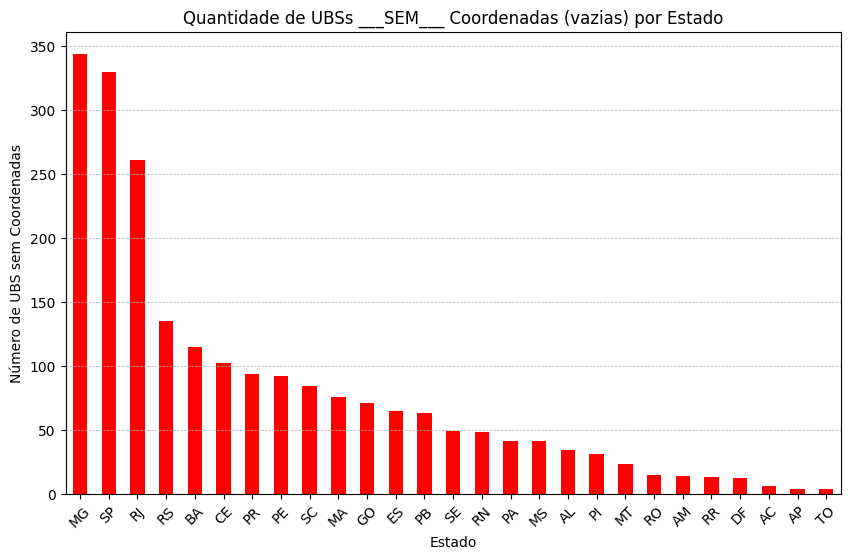

In [58]:

# Identificar UBS sem coordenadas
ubs_sem_coordenadas = ubs[(ubs['LATITUDE'].isna()) | (ubs['LONGITUDE'].isna())]

# Contar quantas UBS sem coordenadas existem por estado
ubs_sem_coordenadas_por_estado = ubs_sem_coordenadas['UF'].value_counts()

# Verificar se o DataFrame não está vazio
if not ubs_sem_coordenadas_por_estado.empty:
    # Criar o gráfico de barras
    plt.figure(figsize=(10, 6))
    ubs_sem_coordenadas_por_estado.sort_values(ascending=False).plot(kind='bar', color='red')
    plt.title('Quantidade de UBSs ___SEM___ Coordenadas (vazias) por Estado')
    plt.xlabel('Estado')
    plt.ylabel('Número de UBS sem Coordenadas')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("Não há UBS sem coordenadas registradas.")
